# Data Munging:
## Its all about treating and fixing missing values in the data set

## Possible Solution: Imputation
### Types:
#### 1) Mean Imputation: This imputation is widely used to replace null values in the dataset. The disadvantage of these imputation is that it may leads to the problem of outliers if extreme values present in the dataset

### 2) Median Imputation: This is better than mean imputation as extreme values does not affect the model
### 3) Mode Imputation: This kind of imputation is mainly used for categorical missing values in the dataset

## Treating missing values using Pandas

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
raw_data_path=os.path.join('/home/sujeet/Desktop/mydocs/Data Science/','data','titanic')
print(raw_data_path)
train_raw_data=os.path.join(raw_data_path,'train.csv')
test_raw_data=os.path.join(raw_data_path,'test.csv')

/home/sujeet/Desktop/mydocs/Data Science/data/titanic


In [3]:
## load the data in the dataframe using pandas
train_df=pd.read_csv(train_raw_data,index_col='PassengerId')
test_df=pd.read_csv(test_raw_data,index_col='PassengerId')

In [4]:
test_df['Survived']=-888

In [6]:
df=pd.concat((train_df,test_df),axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Embarked

In [9]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [10]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
#which emabarked point has higher survival count
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [14]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [15]:
df.Embarked.fillna('C',inplace=True)

In [16]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


## Feature: Fare

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [17]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [19]:
df.groupby(['Pclass','Fare']).Embarked.median()

DataError: No numeric types to aggregate

In [21]:
median_fare=df.loc[(df.Pclass==3)& (df.Embarked=='S'),'Fare'].median()

In [22]:
median_fare

8.05

In [23]:
df.Fare.fillna(median_fare,inplace=True)

In [24]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Age

In [27]:
pd.options.display.max_rows=15

In [28]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


### option 1: replace age missing values with mean of age

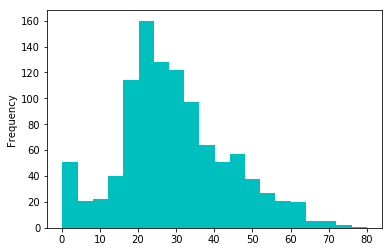

In [37]:
% %matplotlib inline
df.Age.plot(kind='hist',bins=20,color='c')

In [38]:
#mean of Age
df.Age.mean()

29.881137667304014

In [39]:
# check median of Ages
df.Age.median()

28.0

## option 2: replace Age with median by gender

In [40]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

/home/sujeet/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


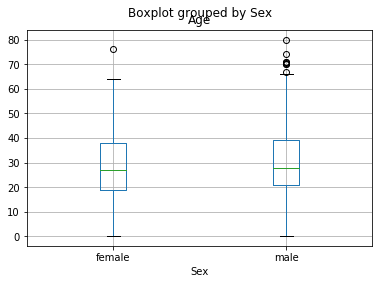

In [41]:
df[df.Age.notnull()].boxplot('Age','Sex')

## option 3: replace age with median by Pclass

In [42]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

## option 4: replace by median of title

In [56]:
def GetTitle(name):
    title_group={'mr':'Mr',
            'mrs':'Mrs',
            'miss':'Miss',
            'master':'Master',
            'don':'Sir',
            'rev':'Sir',
            'dr':'Officer',
            'mme':'Mrs',
            'ms':'Mrs',
            'major':"Officer",
            'lady':'Lady',
            'sir':'Sir',
            'mlle':'Miss',
            'col':'Officer','capt':'Officer',
            'the countess':'Lady',
            'jonkheer':'Sir',
            'dona':'Lady'}
    
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]

In [57]:
df.Name.map(lambda x:GetTitle(x))

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
6           Mr
7           Mr
         ...  
1303       Mrs
1304      Miss
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [58]:
df.Name.map(lambda x:GetTitle(x)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [59]:
df["Title"]=df.Name.map(lambda x: GetTitle(x))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


/home/sujeet/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


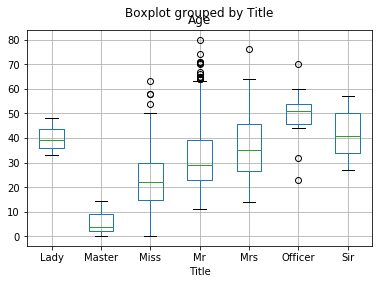

In [61]:
df[df.Age.notnull()].boxplot('Age','Title')

In [64]:
title_age_median=df.groupby('Title').Age.transform('median')

In [65]:
df.Age.fillna(title_age_median,inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [67]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr
